In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt

import xarray as xr
from goespy.Downloader import ABI_Downloader


======================================== goes-py =========================================
 A Python package can be useful to download dataset from goes satellite on AWS  0.2.1v


In [2]:
destination_path = 'C:/Users/jinge/OneDrive/Documents/Research/Learning/Tornado Prediction/GOES-R/RBG_IMG' # I have a folder named "example" where I am downloading the ABI imagery to
bucket = 'noaa-goes16'
year = '2020'
month = '03'
day = '03'
hour = '19'
product = 'ABI-L1b-RadC'
channel = ['C01', 'C02', 'C03']

In [3]:
ABI_Downloader(destination_path, bucket, year, month, day, hour, product, channel)

Downloading... the product ABI-L1b-RadC 


0

In [4]:
bucket = 'noaa-goes17'

In [5]:
ABI_Downloader(destination_path, bucket, year, month, day, hour, product, channel)

Downloading... the product ABI-L1b-RadC 


0

In [6]:
# GOES-16 files
goes_16_C01_files = glob.glob('{destination_path}/{bucket}/{year}/{month}/{day}/{product}/{hour}/{channel}/*'.format(
                    destination_path=destination_path,
                    bucket='goes16', 
                    year=year,
                    month=month,
                    day=day,
                    product=product,
                    hour=hour,
                    channel='C01')
                  )
goes_16_C02_files = glob.glob('{destination_path}/{bucket}/{year}/{month}/{day}/{product}/{hour}/{channel}/*'.format(
                    destination_path=destination_path,
                    bucket='goes16', 
                    year=year,
                    month=month,
                    day=day,
                    product=product,
                    hour=hour,
                    channel='C02')
                  )
goes_16_C03_files = glob.glob('{destination_path}/{bucket}/{year}/{month}/{day}/{product}/{hour}/{channel}/*'.format(
                    destination_path=destination_path,
                    bucket='goes16',
                    year=year,
                    month=month,
                    day=day,
                    product=product,
                    hour=hour,
                    channel='C03')
                  )

# GOES-17 files
goes_17_C01_files = glob.glob('{destination_path}/{bucket}/{year}/{month}/{day}/{product}/{hour}/{channel}/*'.format(
                    destination_path=destination_path,
                    bucket='goes17', 
                    year=year,
                    month=month,
                    day=day,
                    product=product,
                    hour=hour,
                    channel='C01')
                  )
goes_17_C02_files = glob.glob('{destination_path}/{bucket}/{year}/{month}/{day}/{product}/{hour}/{channel}/*'.format(
                    destination_path=destination_path,
                    bucket='goes17', 
                    year=year,
                    month=month,
                    day=day,
                    product=product,
                    hour=hour,
                    channel='C02')
                  )
goes_17_C03_files = glob.glob('{destination_path}/{bucket}/{year}/{month}/{day}/{product}/{hour}/{channel}/*'.format(
                    destination_path=destination_path,
                    bucket='goes17', 
                    year=year,
                    month=month,
                    day=day,
                    product=product,
                    hour=hour,
                    channel='C03')
                  )


In [7]:
# GOES-16
goes_16_C01 = xr.open_dataset(goes_16_C01_files[0])
goes_16_C02 = xr.open_dataset(goes_16_C02_files[0])
goes_16_C03 = xr.open_dataset(goes_16_C03_files[0])

# GOES-17
goes_17_C01 = xr.open_dataset(goes_17_C01_files[0])
goes_17_C02 = xr.open_dataset(goes_17_C02_files[0])
goes_17_C03 = xr.open_dataset(goes_17_C03_files[0])

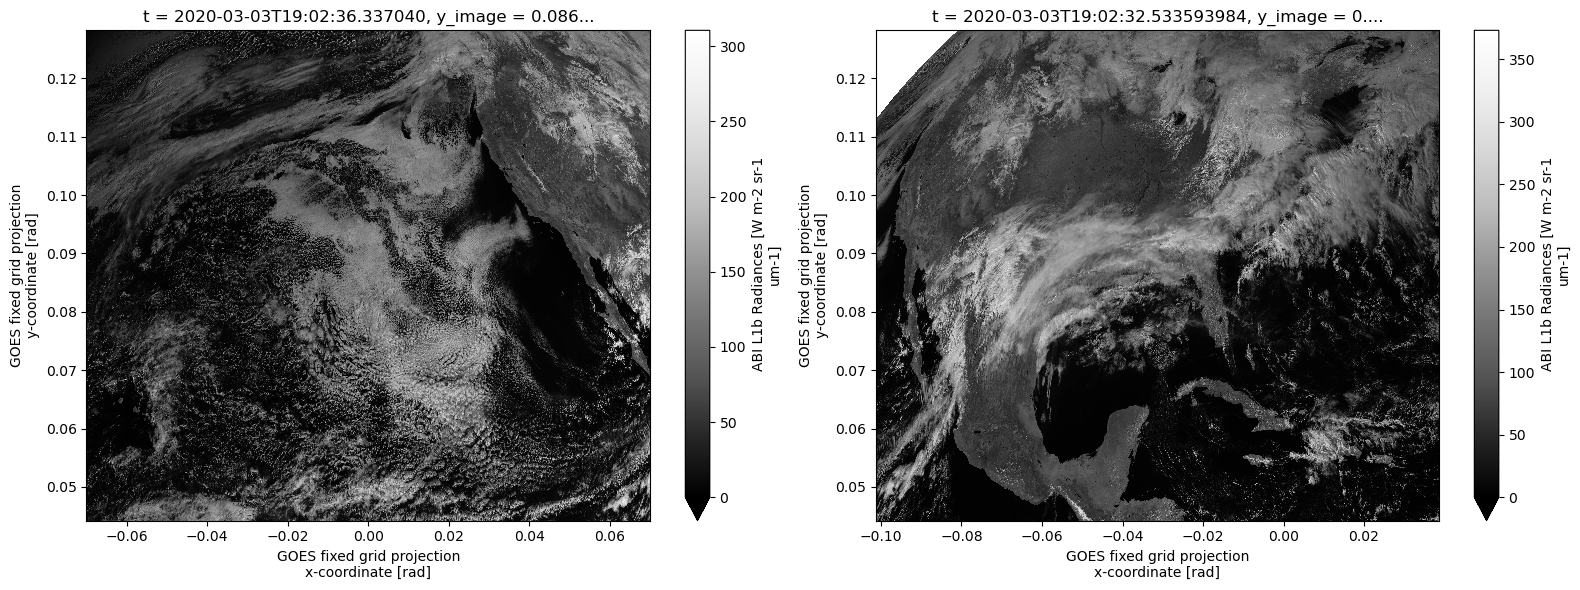

In [8]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(16,6), tight_layout=True)

# GOES-16
goes_16_C03.Rad.plot(ax=ax2, cmap='Greys_r', vmin=0)

# GOES-17
goes_17_C03.Rad.plot(ax=ax1, cmap='Greys_r', vmin=0)

In [13]:
# Define the rebin function
def rebin(a, shape):
    
    sh = shape[0],a.shape[0]//shape[0],shape[1],a.shape[1]//shape[1]
    return a.reshape(sh).mean(-1).mean(1)

def makeABIrgb(R,G,B):

    kappa_B = B['kappa0'].data
    kappa_R = R['kappa0'].data
    kappa_G = G['kappa0'].data

    R_ref = kappa_R * R['Rad'].data
    G_ref = kappa_G * G['Rad'].data 
    B_ref = kappa_B * B['Rad'].data
    

    R_ref = np.clip(R_ref, 0, 1)
    G_ref = np.clip(G_ref, 0, 1)
    B_ref = np.clip(B_ref, 0, 1)


    gamma = 2.2
    Red = np.power(R_ref, 1/gamma)
    Green = np.power(G_ref, 1/gamma)
    Blue = np.power(B_ref, 1/gamma)

    Red_rescaled = rebin(Red, [3000, 5000])


    Green_true = 0.45 * Red_rescaled + 0.1 * Green + 0.45 * Blue
    Green_true = np.clip(Green_true, 0, 1)  # Apply band limits again, just in case.

    RGB_veggie = np.dstack([Red_rescaled, Green, Blue])

    RGB = np.dstack([Red_rescaled, Green_true, Blue])
    
    return RGB, RGB_veggie

In [14]:
# GOES-16
goes16_RGB, goes16_RGB_veggie = makeABIrgb(goes_16_C02, goes_16_C03, goes_16_C01)

In [15]:
# GOES-17
goes17_RGB, goes17_RGB_veggie = makeABIrgb(goes_17_C02, goes_17_C03, goes_17_C01)

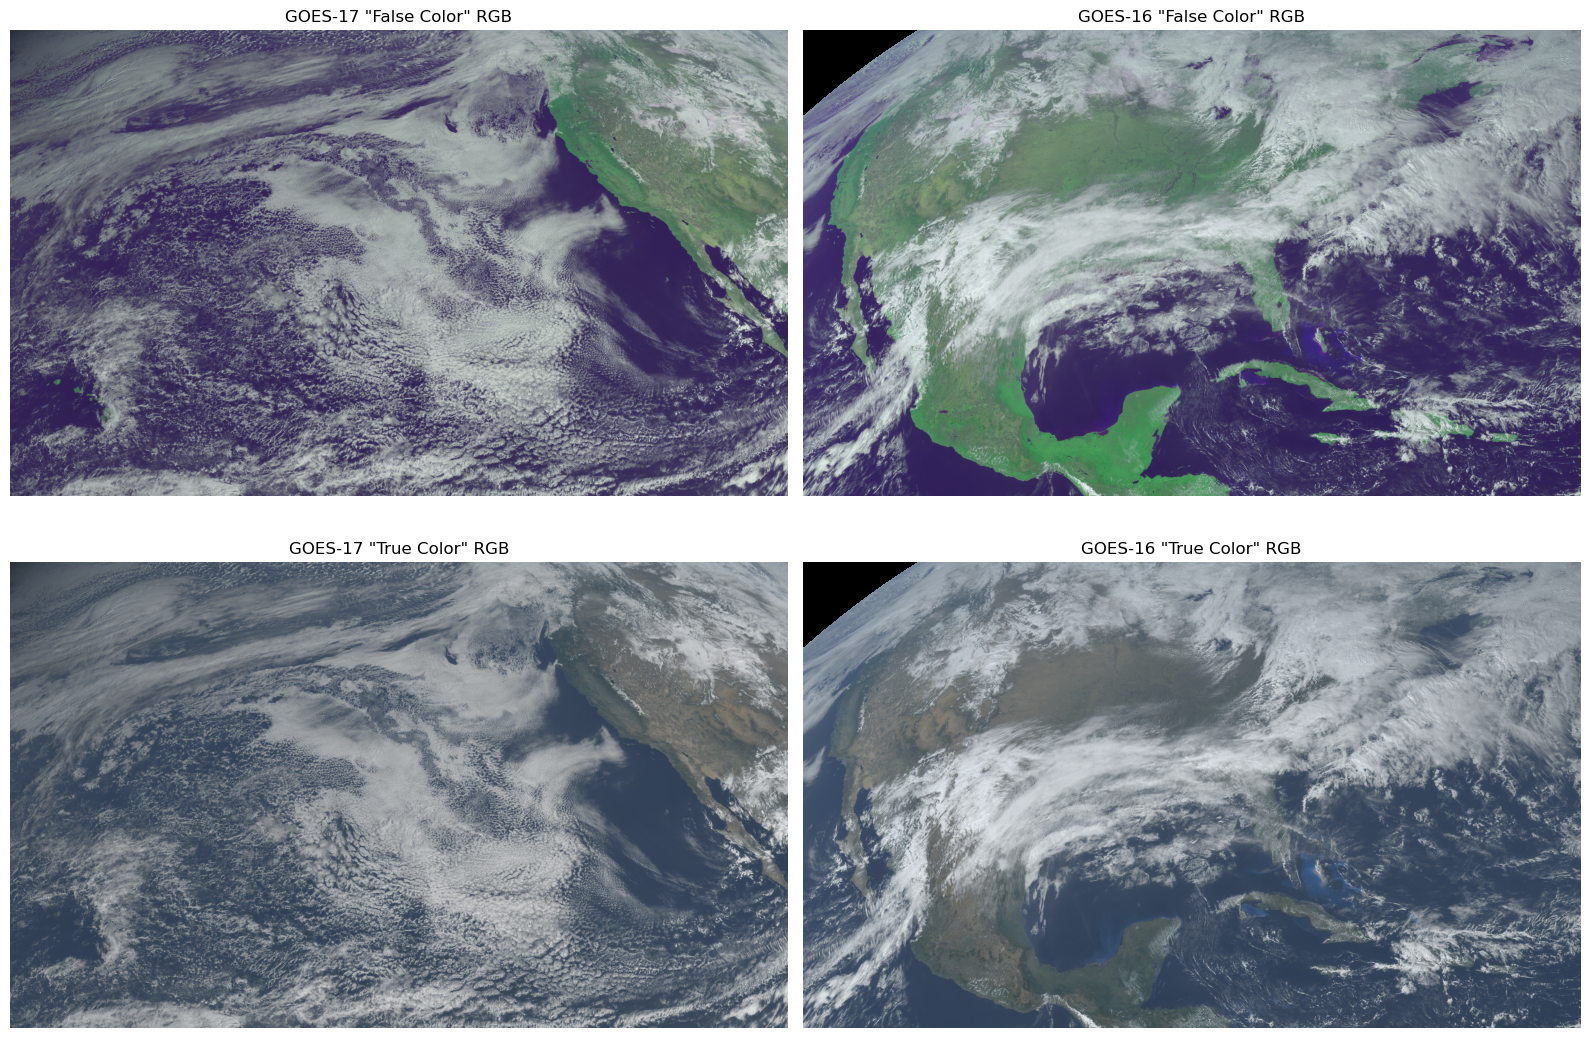

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(16, 12), tight_layout=True)
[ax1, ax2, ax3, ax4] = ax.flatten()

# GOES-17 False Color: RGB using the NIR "Veggie" Band
ax1.imshow(goes17_RGB_veggie)
ax1.set_title('GOES-17 "False Color" RGB')
ax1.axis('off')

# GOES-16 False Color: RGB using the NIR "Veggie" Band
ax2.imshow(goes16_RGB_veggie)
ax2.set_title('GOES-16 "False Color" RGB')
ax2.axis('off')

# GOES-17 True Color: RGB for the true color image
ax3.imshow(goes17_RGB)
ax3.set_title('GOES-17 "True Color" RGB')
ax3.axis('off')

# GOES-16 True Color: RGB for the true color image
ax4.imshow(goes16_RGB)
ax4.set_title('GOES-16 "True Color" RGB')
ax4.axis('off');